Original Hex Codes:
['#080808', '#6F6F6F', '#D8D8D8', '#F9F0FB', '#2974B3', '#8C5798', '#AB375D', '#B41B08', '#D33B10', '#DA8716', '#E0BE0D', '#D6D51E', '#276223', '#3B8F3F', '#606761', '#9A9B68', '#AC9D89', '#7F4B7F', '#BF8CC0', '#CADBED', '#D4FFFE']

Protanopia-Simulated Hex Codes:
['#080808', '#6F6F6F', '#D8D8D8', '#F5F5F8', '#494AA3', '#757488', '#787753', '#71700C', '#918F1A', '#B6B531', '#D1D037', '#D5D54A', '#404132', '#5F6052', '#636362', '#9A9A74', '#A5A58D', '#686872', '#A8A8B3', '#D1D1E8', '#E6E6FE']

Deuteranopia-Simulated Hex Codes:
['#080808', '#6F6F6F', '#D8D8D7', '#F5F6F7', '#453FA0', '#787C84', '#7F8851', '#7A860D', '#9AA51C', '#BAC137', '#D3D542', '#D5D554', '#3D3835', '#5A5457', '#626262', '#9A9A77', '#A6A78F', '#6B6F6F', '#ABAFB0', '#D0CFE7', '#E4E0FE']


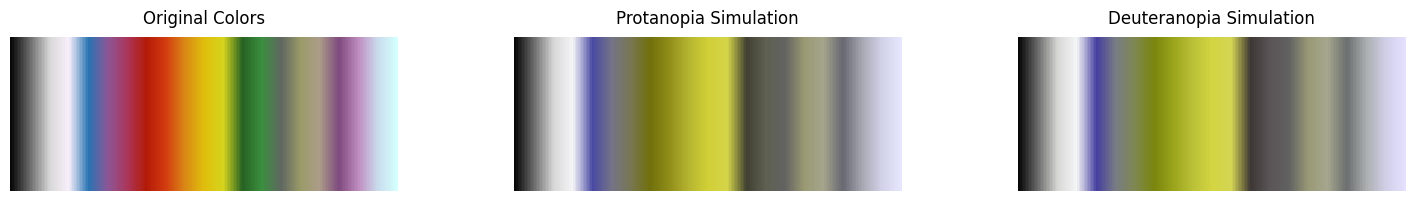

In [3]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

# Define the original hex color codes
hex_colors = [
    '#080808', '#6F6F6F', '#D8D8D8', '#F9F0FB', '#2974B3',
    '#8C5798', '#AB375D', '#B41B08', '#D33B10', '#DA8716',
    '#E0BE0D', '#D6D51E', '#276223', '#3B8F3F', '#606761',
    '#9A9B68', '#AC9D89', '#7F4B7F', '#BF8CC0', '#CADBED',
    '#D4FFFE'
]

# Function to convert hex to RGB
def hex_to_rgb(hex_code):
    hex_code = hex_code.lstrip('#')
    return tuple(int(hex_code[i:i+2], 16) / 255.0 for i in (0, 2, 4))

# Function to convert RGB to hex
def rgb_to_hex(rgb):
    return '#' + ''.join(f'{int(c * 255):02X}' for c in rgb)

# Apply colorblindness simulation using transformation matrices
def simulate_cvd_manual(hex_colors, cvd_type):
    # Transformation matrices for protanopia and deuteranopia
    matrices = {
        "protanopia": np.array([[0.56667, 0.43333, 0.0],
                                [0.55833, 0.44167, 0.0],
                                [0.0, 0.24167, 0.75833]]),
        "deuteranopia": np.array([[0.625, 0.375, 0.0],
                                  [0.7, 0.3, 0.0],
                                  [0.0, 0.3, 0.7]])
    }

    if cvd_type not in matrices:
        raise ValueError(f"Invalid CVD type: {cvd_type}")

    transformation_matrix = matrices[cvd_type]
    rgb_colors = np.array([hex_to_rgb(color) for color in hex_colors])  # Normalized to [0, 1]

    # Apply 
    simulated_rgb_colors = np.dot(rgb_colors, transformation_matrix.T)
    simulated_rgb_colors = np.clip(simulated_rgb_colors, 0, 1)  # Ensure values are within bounds

    # Convert back to hex
    simulated_hex_colors = [rgb_to_hex(color) for color in simulated_rgb_colors]
    return simulated_hex_colors

# Create a gradient colormap
def create_gradient_cmap(hex_colors):
    rgb_colors = [hex_to_rgb(color) for color in hex_colors]
    return LinearSegmentedColormap.from_list("gradient_cmap", rgb_colors)

# Plot the original, protanopia, and deuteranopia colorbars
def plot_colorbars(original_hex_colors, protanopia_hex_colors, deuteranopia_hex_colors):
    original_cmap = create_gradient_cmap(original_hex_colors)
    protanopia_cmap = create_gradient_cmap(protanopia_hex_colors)
    deuteranopia_cmap = create_gradient_cmap(deuteranopia_hex_colors)

    fig, axes = plt.subplots(1, 3, figsize=(18, 2))
    fig.subplots_adjust(wspace=0.3)

    # Original colors
    gradient = np.linspace(0, 1, 256).reshape(1, -1)
    axes[0].imshow(gradient, aspect="auto", cmap=original_cmap)
    axes[0].set_axis_off()
    axes[0].set_title("Original Colors", pad=10)

    # Protanopia 
    axes[1].imshow(gradient, aspect="auto", cmap=protanopia_cmap)
    axes[1].set_axis_off()
    axes[1].set_title("Protanopia Simulation", pad=10)

    # Deuteranopia colors
    axes[2].imshow(gradient, aspect="auto", cmap=deuteranopia_cmap)
    axes[2].set_axis_off()
    axes[2].set_title("Deuteranopia Simulation", pad=10)

    plt.show()

# Simulate 'em
protanopia_hex_colors = simulate_cvd_manual(hex_colors, "protanopia")
deuteranopia_hex_colors = simulate_cvd_manual(hex_colors, "deuteranopia")

# Print the hex codes for both simulations
print("Original Hex Codes:")
print(hex_colors)
print("\nProtanopia-Simulated Hex Codes:")
print(protanopia_hex_colors)
print("\nDeuteranopia-Simulated Hex Codes:")
print(deuteranopia_hex_colors)

# Plot all colorbars
plot_colorbars(hex_colors, protanopia_hex_colors, deuteranopia_hex_colors)





#For use in a script, heres an example of how to create a custom colormap in your script: 

#hex_colors = ['#080808', '#6F6F6F', '#D8D8D8', '#F9F0FB', '#2974B3', '#8C5798', '#AB375D', '#B41B08', '#D33B10', '#DA8716', '#E0BE0D', '#D6D51E', '#276223', '#3B8F3F', '#606761', '#9A9B68', '#AC9D89', '#7F4B7F', '#BF8CC0', '#CADBED', '#D4FFFE']
#rgb_colors = [mcolors.hex2color(hex_code) for hex_code in hex_colors]

#reversed_rgb_colors = rgb_colors[::-1]

#custom_colormap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", reversed_rgb_colors)
